<a href="https://colab.research.google.com/github/HanseulJo/KiTS19_2dUnet/blob/main/kits19_unet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KiTS19 Challenge**

Useful webpages:
* KiTS19 homepage:  https://kits19.grand-challenge.org/
* GitHub kits21:  https://github.com/neheller/kits21

# INSTALL & DOWNLOAD

## Install

In [1]:
%cd /content/
!git clone https://github.com/neheller/kits19
%cd kits19

/content
fatal: destination path 'kits19' already exists and is not an empty directory.
/content/kits19


In [2]:
!pip3 install -r requirements.txt

In [3]:
!pip install -U albumentations

## Download Image

It takes about 1 hour

In [ ]:
!python3 -m starter_code.get_imaging_v2

271 cases to download...
1/271... 
2/271... 
3/271... 
4/271... 
5/271... 
6/271... 
7/271... 
8/271... 
9/271... 
10/271... 
11/271... 
12/271... 
13/271... 
14/271... 
15/271... 
16/271... 
17/271... 
18/271... 
19/271... 
20/271... 
21/271... 
22/271... 
23/271... 
24/271... 
25/271... 
26/271... 
27/271... 
28/271... 
29/271... 
30/271... 
31/271... 
32/271... 
33/271... 
34/271... 
35/271... 
36/271... 
37/271... 
38/271... 
39/271... 
40/271... 
41/271... 
42/271... 
43/271... 
44/271... 
45/271... 
46/271... 
47/271... 
48/271... 
49/271... 
50/271... 
51/271... 
52/271... 
53/271... 
54/271... 
55/271... 
56/271... 
57/271... 
58/271... 
59/271... 
60/271... 
61/271... 
62/271... 
63/271... 
64/271... 
65/271... 
66/271... 
67/271... 
68/271... 
69/271... 
70/271... 
71/271... 
72/271... 
73/271... 
74/271... 
75/271... 
76/271... 
77/271... 
78/271... 
79/271... 
80/271... 
81/271... 
82/271... 
83/271... 
84/271... 
85/271... 
86/271... 
87/271... 
88/271... 
89/271... 
90/27

## Brief Visualizations


Data (`kits19/data`) structure:

```
data
├── case_00000
|   ├── imaging.nii.gz       ──> CT image (Nifty1Image, dtype=np.float32, range=[-2048.0, 2048.0], size=(*, 512, 512))
|   └── segmentation.nii.gz  ──> segment. (Nifty1Image, dtype=np.uint8,   range={0,1,2},           size=(*, 512, 512))
├── case_00001
|   ├── imaging.nii.gz
|   └── segmentation.nii.gz
...
├── case_00209
|   ├── imaging.nii.gz
|   └── segmentation.nii.gz
└── kits.json

```

In [ ]:
# Loading a data
from starter_code.utils import load_case
import numpy as np

case_num = 32
volume, segmentation = load_case(f"case_{case_num:05d}")
vol_np, seg_np = volume.get_fdata(), segmentation.get_fdata().astype(np.uint8)
print("SIZES")
print("volume:", vol_np.shape)
print("segmen:", seg_np.shape)
print("RANGES")
print("volume:", vol_np.min(), vol_np.max())
print("segmen:", seg_np.min(), seg_np.max())

SIZES
volume: (189, 512, 512)
segmen: (189, 512, 512)
RANGES
volume: -2048.0 1664.0
segmen: 0 2


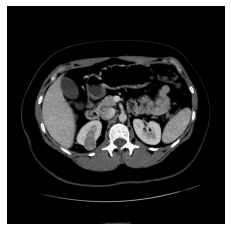

In [ ]:
import matplotlib.pyplot as plt

slice_num = 55
_sl = vol_np[slice_num].copy()
np.clip(_sl, -79, 304, out=_sl)
_sl = (_sl - _sl.min()) * 255 / (_sl.max() - _sl.min())
_sl = _sl.astype(np.uint8)
plt.imshow(_sl)
plt.gray()
plt.axis('off')
plt.show()

In [ ]:
from starter_code.visualize import visualize

%mkdir visualize
visualize(f"case_{case_num:05d}", f"./visualize/case_{case_num:05d}/")

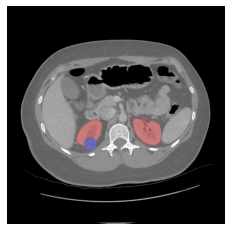

In [ ]:
# Result of visualize(.)
import matplotlib.image as mpimg

img = mpimg.imread(f"./visualize/case_{case_num:05d}/{slice_num:05d}.png")
plt.imshow(img)
plt.axis('off')
plt.show()

# Dataset split: Train / Test




### How to

0.   Nifty1Image (3차원)
1.   Numpy array로 변경 (3차원)
2.   slice 별로 나누기 ( (slices,512,512) array --> slices개의 (512,512) arrays )
3.   다음과 같은 구조로 저장...하지 못함 (용량문제):
```
dataset
├── train/[input, label]
|   ├── case_00000
|   |   ├── slice00000.npy
|   |   ├── ...    
|   |   └── slice*****.npy
|   ...
|   └── case_00209
|       ├── slice00000.npy
|       ├── ...    
|       └── slice*****.npy
└── test/input
.   ├── case_00210
.   |   ├── slice00000.npy
.   |   ├── ...    
.   |   └── slice*****.npy
.   ...
.   ├── case_00299
.       ├── slice00000.npy
.       ├── ...    
.       └── slice*****.npy
```

(아래 cell의 결과:)

slice_mean_raw: -528.001464341208

slice_mean_clip: -41.72803774640014

slice_mean_0to1: 0.09731582833838097

slice per case (train): [611, 602, 261, 270, 64, 834, 157, 61, 227, 77, 50, 80, 89, 92, 439, 75, 178, 97, 121, 129, 96, 38, 541, 107, 85, 103, 302, 723, 98, 131, 38, 117, 189, 423, 110, 98, 163, 97, 32, 90, 207, 52, 301, 172, 101, 62, 159, 142, 85, 670, 96, 68, 673, 553, 104, 101, 90, 80, 103, 738, 145, 29, 86, 527, 53, 103, 445, 285, 626, 90, 57, 612, 164, 145, 80, 90, 66, 88, 326, 124, 88, 151, 129, 94, 274, 87, 199, 49, 99, 55, 76, 735, 98, 787, 43, 314, 683, 85, 234, 105, 470, 512, 316, 665, 114, 153, 102, 84, 51, 76, 34, 186, 113, 43, 304, 325, 433, 69, 673, 91, 285, 79, 50, 389, 262, 171, 107, 105, 206, 48, 53, 159, 532, 186, 61, 634, 101, 109, 76, 103, 279, 581, 274, 92, 197, 86, 591, 70, 36, 97, 106, 1059, 38, 69, 470, 538, 987, 548, 705, 719, 252, 59, 94, 99, 88, 734, 103, 103, 83, 101, 345, 131, 91, 97, 69, 107, 102, 88, 88, 99, 137, 99, 93, 195, 146, 235, 143, 82, 365, 146, 161, 349, 133, 233, 135, 98, 178, 162, 269, 121, 103, 96, 383, 620, 75, 93, 60, 140, 89, 102]


### Code

It takes about ~2 hours.

In [4]:
# Slice statistics (training data):

import os
from tqdm.auto import tqdm  # clean tqdm for jupyter
import numpy as np
from starter_code.utils import load_volume, load_segmentation

SAVE = False

CASES = {'train': range(210), 'test': range(210, 300),}
CLIP_RANGE = [-79, 304]
clip_range = CLIP_RANGE[1] - CLIP_RANGE[0]
total_slice_num = 0
train_slice_nums = [0 for _ in CASES['train']]
slice_mean_raw = 0.
slice_mean_clip = 0.
slice_mean_0to1 = 0.
classified_slice_num = [[[], [], []] for _ in CASES['train']]


for phase in ['train']:
  for case_num in tqdm(CASES[phase], desc=phase):
    # Load Nifty1Image image,
    # Convert to numpy & create directories
    if SAVE:
      _dir_vol = os.path.join('dataset', phase, 'input', f"case_{case_num:05d}")
      try:
        os.makedirs(_dir_vol)
      except FileExistsError:
        continue
    volume = load_volume(f"case_{case_num:05d}")
    vol_np = volume.get_fdata()
    if phase == 'train':
      if SABE:
        _dir_seg = os.path.join('dataset', phase, 'label', f"case_{case_num:05d}")
        try:
          os.makedirs(_dir_seg)
        except FileExistsError:
          continue
      segmentation = load_segmentation(f"case_{case_num:05d}")
      seg_np = segmentation.get_fdata().astype(np.uint8)  # uint8

    # save images (clip to [-79.0, 304.0], rescale to [0, 255] uint8)
    slices = range(vol_np.shape[0])
    for slice_num in slices:
      _sl = vol_np[slice_num].copy()
      _sl_clip = np.clip(_sl, *CLIP_RANGE)
      _sl_0to1 = (_sl_clip - CLIP_RANGE[0]) / clip_range
      if SAVE:
        _filename_vol = os.path.join(_dir_vol, f'slice{slice_num:05d}.npy')
        np.save(_filename_vol, (_sl_0to1 * 255).astype(np.uint8))
      if phase == 'train':
        _slsg = seg_np[slice_num]
        label_max = _slsg.max()
        # classify slices: whole slice / slice with kidney / slice with kidney+tumor
        for lab in range(label_max+1):
            classified_slice_num[case_num][lab].append(slice_num)
        # slice statistics
        # (1) Raw pixel mean, (2) clipped mean, (3) clip & standardized mean,
        # (4) slices per cases
        train_slice_nums[case_num] += 1
        total_slice_num += 1
        slice_mean_raw += _sl.mean()
        slice_mean_clip += _sl_clip.mean()
        slice_mean_0to1 += _sl_0to1.mean()
        if SAVE:
          _filename_seg = os.path.join(_dir_seg, f'slice{slice_num:05d}.npy')
          np.save(_filename_seg, _slsg)

slice_mean_raw /= total_slice_num
slice_mean_clip /= total_slice_num
slice_mean_0to1 /= total_slice_num

print("slice_mean_raw:", slice_mean_raw)
print("slice_mean_clip:", slice_mean_clip)
print("slice_mean_0to1:", slice_mean_0to1)

print("\nslice per case (train):\n", train_slice_nums)

print("\nclassified_slice_num (train):\n", np.array(classified_slice_num))


slice_mean_raw: -528.001464341208
slice_mean_clip: -41.72803774640014
slice_mean_0to1: 0.09731582833838097

slice per case (train): [611, 602, 261, 270, 64, 834, 157, 61, 227, 77, 50, 80, 89, 92, 439, 75, 178, 97, 121, 129, 96, 38, 541, 107, 85, 103, 302, 723, 98, 131, 38, 117, 189, 423, 110, 98, 163, 97, 32, 90, 207, 52, 301, 172, 101, 62, 159, 142, 85, 670, 96, 68, 673, 553, 104, 101, 90, 80, 103, 738, 145, 29, 86, 527, 53, 103, 445, 285, 626, 90, 57, 612, 164, 145, 80, 90, 66, 88, 326, 124, 88, 151, 129, 94, 274, 87, 199, 49, 99, 55, 76, 735, 98, 787, 43, 314, 683, 85, 234, 105, 470, 512, 316, 665, 114, 153, 102, 84, 51, 76, 34, 186, 113, 43, 304, 325, 433, 69, 673, 91, 285, 79, 50, 389, 262, 171, 107, 105, 206, 48, 53, 159, 532, 186, 61, 634, 101, 109, 76, 103, 279, 581, 274, 92, 197, 86, 591, 70, 36, 97, 106, 1059, 38, 69, 470, 538, 987, 548, 705, 719, 252, 59, 94, 99, 88, 734, 103, 103, 83, 101, 345, 131, 91, 97, 69, 107, 102, 88, 88, 99, 137, 99, 93, 195, 146, 235, 143, 82, 365

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:75: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [5]:
classified_slice_cnt = [[len(x), len(y), len(z)] for x, y, z in classified_slice_num]

print(np.array(classified_slice_cnt))
print()
print(np.array(classified_slice_cnt).cumsum(axis=0))


[[ 611  262   57]
 [ 602  217   88]
 [ 261  161   42]
 [ 270  133   29]
 [  64   34    8]
 [ 834  283  119]
 [ 157   34   11]
 [  61   37   10]
 [ 227   54   39]
 [  77   45    9]
 [  50   41   10]
 [  80   23   10]
 [  89   28   15]
 [  92   36   14]
 [ 439  120   18]
 [  75   38   12]
 [ 178   51   18]
 [  97   27    5]
 [ 121   46   15]
 [ 129   35    4]
 [  96   27    4]
 [  38   22    6]
 [ 541  211   47]
 [ 107   48    6]
 [  85   23   12]
 [ 103   62   44]
 [ 302   54   36]
 [ 723  259   47]
 [  98   35   19]
 [ 131   27   10]
 [  38   32   32]
 [ 117   37    9]
 [ 189   51   12]
 [ 423  122   32]
 [ 110   25    8]
 [  98   28    7]
 [ 163   43   22]
 [  97   34   20]
 [  32   26   10]
 [  90   27    6]
 [ 207  108   13]
 [  52   44   17]
 [ 301  164  146]
 [ 172   44    9]
 [ 101   26   13]
 [  62   34   17]
 [ 159   50   17]
 [ 142   26   16]
 [  85   27    9]
 [ 670  208   54]
 [  96   47    5]
 [  68   48   19]
 [ 673  255   59]
 [ 553  198   88]
 [ 104   32    5]
 [ 101   3

# Network: U-net



In [137]:
import torch
from torch import nn

def CNA(in_ch, out_ch, kernel_size=3, stride=1, padding=1,
        norm_layer=nn.InstanceNorm2d,
        activation=nn.ReLU):
    """
    Conv - IN(Normalization) - ReLU(Activation) Block
    """
    layers = [nn.Conv2d(in_ch, out_ch, kernel_size=kernel_size, stride=stride, padding=padding, bias=False), norm_layer(out_ch),]
    if activation is not None:
        layers.append(activation(inplace=True))
    return nn.Sequential(*layers)

def CC(in_ch, out_ch, start_stride=1):
    """
    [ Conv2d(possibly strided) - Normalization - ReLU(Activation) ] * 2 Block
    """
    return nn.Sequential(CNA(in_ch, out_ch, stride=start_stride), CNA(out_ch, out_ch)) 

class ResidualBlock(nn.Module):
    def __init__(self, in_ch, out_ch, stride=1):
        super().__init__()
        self.cn1 = CNA(in_ch,  out_ch, stride=stride)
        self.cn2 = CNA(out_ch, out_ch, activation=None)
    def forward(self, x):
        out = self.cn2(cn1(x)) + x
        return nn.ReLU(inplace=True)(out)

def RR(in_ch, out_ch, start_stride=1, length=2):
    """
    [ ResidualBlock ] * 2 Block
    """
    layer = [ResidualBlock(out_ch, out_ch) for _ in range(length-1)]
    layer = [ResidualBlock(in_ch, out_ch, stride=start_stride)] + layer
    return nn.Sequential(*layer) 

def UpCon(in_ch, out_ch, kernel_size=2, stride=2, padding=0, bias=True):
    return nn.ConvTranspose2d(in_ch, out_ch, kernel_size=kernel_size, stride=stride, padding=padding, bias=bias)

class PlainUnet(nn.Module):
    hidden_ch = 64  # hidden channel
    def __init__(self, in_ch, out_ch, depth=5):
        super().__init__()
        self.layers = nn.ModuleDict()
        self.depth = depth
        # Encoder
        CH = self.hidden_ch
        self.layers['enc1'] = CC(in_ch, CH)
        for i in range(2, depth):
          self.layers[f'enc{i}'] = CC(CH, CH*2, start_stride=2)
          CH *= 2
        self.layers[f'enc{depth}'] = CNA(CH, CH*2, stride=2)
        # Decoder
        self.layers[f'dec{depth}'] = nn.Sequential(CNA(CH*2, CH*2), UpCon(CH*2, CH))
        for i in range(2, depth)[::-1]:
          self.layers[f'dec{i}'] = nn.Sequential(CC(CH*2, CH), UpCon(CH, CH//2))
          CH = CH // 2
        assert self.hidden_ch == CH
        self.layers[f'dec1'] = nn.Sequential(CC(CH*2, CH), nn.Conv2d(CH, out_ch, kernel_size=1))
    def forward(self, x):
        depth = self.depth
        # Encoder
        skip_conn = [x]
        for i in range(1, depth):
          skip_conn.append(self.layers[f'enc{i}'](skip_conn[-1]))
        out = self.layers[f'enc{depth}'](skip_conn[-1])
        # Decoder
        out = self.layers[f'dec{depth}'](out)
        for i in range(1,depth)[::-1]:
          out = torch.cat((skip_conn.pop(), out), dim=1) # skip connection
          out = self.layers[f'dec{i}'](out)
        return out

class ResidualUnet(nn.Module):
    hidden_ch = 64  # hidden channel
    def __init__(self, in_ch, out_ch, depth=5):
        super().__init__()
        self.layers = nn.ModuleDict()
        self.depth = depth
        # Encoder
        CH = hidden_ch
        self.layers['enc1'] = RR(in_ch, CH)
        for i in range(2, depth):
          self.layers[f'enc{i}'] = RR(CH, CH*2, start_stride=2, length=i)
          CH *= 2
        self.layers[f'enc{depth}'] = ResidualBlock(CH, CH*2, stride=2)
        # Decoder
        self.layers[f'dec{depth}'] = nn.Sequential(RR(CH*2, CH*2, length=depth-1), UpCon(CH*2, CH))
        for i in range(2, depth)[::-1]:
          self.layers[f'dec{i}'] = nn.Sequential(CNA(CH*2, CH), UpCon(CH, CH//2))
          CH = CH // 2
        assert hidden_ch == CH
        self.layers[f'dec1'] = nn.Sequential(CNA(CH*2, CH), nn.Conv2d(CH, out_ch, kernel_size=1))
    def forward(self, x):
        depth = self.depth
        # Encoder
        skip_conn = [x]
        for i in range(1, depth):
          skip_conn.append(self.layers[f'enc{i}'](skip_conn[-1]))
        out = self.layers[f'enc{depth}'](skip_conn[-1])
        # Decoder
        out = self.layers[f'dec{depth}'](out)
        for i in range(1,depth)[::-1]:
          out = torch.cat((skip_conn.pop(), out), dim=1) # skip connection
          out = self.layers[f'dec{i}'](out)
        return out

In [7]:
from torch.nn import init
def weight_init(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.ConvTranspose2d):
        init.kaiming_normal_(m.weight)
        if m.bias is not None:
            init.constant_(m.bias, 0)
    elif isinstance(m, nn.BatchNorm2d):
        init.constant_(m.weight, 1)
        init.constant_(m.bias, 0)

# Dataset (Pytorch)

16336
torch.Size([1, 384, 384])
torch.Size([384, 384])


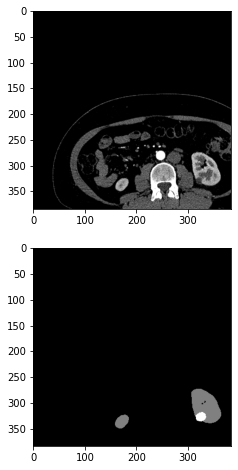

In [121]:
import os
import torch
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import albumentations as A

cumul_slices_per_case = np.array(classified_slice_cnt).cumsum(axis=0)

def find_case_slice(idx, slice_type):
    case_num = 0
    while cumul_slices_per_case[case_num, slice_type] <= idx:
      case_num += 1
    slice_idx = idx - (cumul_slices_per_case[case_num-1][slice_type] if case_num > 0 else 0)
    slice_num = classified_slice_num[case_num][slice_type][slice_idx]
    return case_num, slice_num

def train_transform(image, mask, crop=384):
    A_transform = A.Compose([
        A.ElasticTransform(alpha=1, sigma=50, alpha_affine=30),
        A.RandomCrop(crop,crop),
        A.HorizontalFlip()])
    transformed = A_transform(image=image, mask=mask)
    image, mask = transformed['image'], transformed['mask']
    return image, mask

def valid_transform(image, mask, crop=512):
    A_transform = A.CenterCrop(crop, crop)
    transformed = A_transform(image=image, mask=mask)
    image, mask = transformed['image'], transformed['mask']
    return image, mask


class KiTS19TrainDataset(Dataset):
    T_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((slice_mean_0to1,),(0.5,))])
    def __init__(self, slice_type=1, max_label=2, transform=None, crop=384):
        self.slice_type = slice_type  # 0: whole set / 1: kidney only + (kidney+tumor) / 2: kidney+tumor
        self.max_label = max_label    # 1: kidney only / 2: kidney+tumor
        self.transform = transform
        self.crop = crop
    def __len__(self):
        return cumul_slices_per_case[-1][self.slice_type]
    def __getitem__(self, idx):
        case_, slice_ = find_case_slice(idx, self.slice_type)
        dataset_dir = os.path.join('dataset', 'train')
        self.file_name = os.path.join(f'case_{case_:05d}', f'slice{slice_:05d}.npy')
        vol = np.load(os.path.join(dataset_dir, 'input', self.file_name))
        seg = np.load(os.path.join(dataset_dir, 'label', self.file_name))
        if self.max_label < 2:
            np.clip(seg, 0, self.max_label, out=seg)  # suppress tumor label to 1
        if self.transform is not None:
            vol, seg = self.transform(vol, seg, crop=self.crop)  # augmentation
        vol = self.T_transform(vol)
        seg = torch.Tensor(seg).squeeze()
        return vol.float(), seg.float()

_dataset = KiTS19TrainDataset(slice_type=1, max_label=2, transform=train_transform)
print(len(_dataset))
_img, _seg = _dataset.__getitem__(206)
print(_img.size())
print(_seg.size())
_f, _ax = plt.subplots(2, 1, figsize=(8, 8))
plt.gray()
_ax[0].imshow(_img.squeeze().numpy())
_ax[1].imshow(_seg.numpy())
pass

# Loss function


In [54]:
from torch import nn

ce_loss = nn.functional.cross_entropy

def dice_coeff_label(predict_, target_, label):
    """
    evaluate how much predict == target == label.
    """
    assert label > 0
    predict = predict_.clone().detach().cpu().view(-1)
    target = target_.clone().detach().cpu().view(-1)
    predict[predict!=label] = 0
    target[target!=label] = 0
    predict = predict / label
    target  = target / label
    smooth = 1e-4
    dice = 2*((predict*target).sum()) / (predict.sum() + target.sum() + smooth)
    return dice.item()

def dice_coeff(predict, target):
    label_num = int(target.max().item())
    assert label_num > 0
    dice_sum = 0.
    for l in range(1,label_num+1):
        dice_sum += dice_coeff_label(predict, target, l)
    return dice_sum/label_num

def dice_loss(output, target):
    predict = output.argmax(dim=1)
    return torch.Tensor([-dice_coeff(predict, target) + 1.]).to(output.device)

def ce_dice_loss(output, target, **kwargs):
    target = target.long()
    return dice_loss(output, target) + ce_loss(output, target, **kwargs)


In [55]:
_in = torch.Tensor([[[[1,1,1],
                      [0,2,0],
                      [1,0,1]],
                     [[2,0,0],
                      [1,1,1],
                      [2,1,0]],
                     [[-1,4,7],
                      [-3,0,0],
                      [-4,4,-3]]]])
_out = torch.Tensor([[[1,2,2],
                      [1,0,1],
                      [1,2,0]]])
_in_pred = _in.argmax(dim=1)
print(_in_pred)

_loss = dice_coeff_label(_in_pred, _out,1)
print("dice_coeff_label(_in_pred, _out,1)", _loss)
_loss = dice_coeff_label(_in_pred, _out,2)
print("dice_coeff_label(_in_pred, _out,2)", _loss)
_loss = dice_loss(_in, _out)
print("dice_loss(_in, _out)", _loss)
_loss = ce_dice_loss(_in, _out, reduction='sum')
print("ce_dice_loss(_in, _out)", _loss)

tensor([[[1, 2, 2],
         [1, 0, 1],
         [1, 2, 0]]])
dice_coeff_label(_in_pred, _out,1) 0.9999874830245972
dice_coeff_label(_in_pred, _out,2) 0.9999833106994629
dice_loss(_in, _out) tensor([1.4603e-05])
ce_dice_loss(_in, _out) tensor([2.4114])


# Training function

In [92]:
import time
import sys

def train(args, model, device, train_loader, criterion, optimizer, epoch):
    model.train()
    train_loss = 0.
    train_acc = 0.
    train_dice = 0.
    used_data_size = 0
    loader_length = len(train_loader)
    log_str = None
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)

        data_size = data.numel() 
        used_data_size += data_size

        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target, reduction='mean')
        if loss.isnan():
            raise ValueError("NAN Loss")
        loss.backward()
        optimizer.step()
        _loss = loss.item()
        train_loss += _loss * data_size
        pred = output.argmax(dim=1)
        correct = pred.eq(target).sum().item()
        train_acc += correct
        _dice = dice_coeff(pred, target) 
        train_dice += _dice * data_size
        if batch_idx % args.log_interval == 0:
            if log_str is not None:
               print('\b' * (len(log_str)+1))
            log_str = f'Train. (epoch{epoch}, {batch_idx}/{loader_length}): Loss: {_loss:.4f}, Accuracy: {100.*correct/data_size:.4f}%, Dice: {_dice:.4f}'
            sys.stdout.write(log_str)
            sys.stdout.flush()
    
    train_dice /= used_data_size
    train_loss /= used_data_size
    accuracy = 100. * train_acc / used_data_size
    print(f'\nTrain. (epoch{epoch} done.): Average loss: {train_loss:.4f}, Accuracy: {accuracy:.4f}%, Dice: {train_dice:.4f}')
    
    return (train_loss, accuracy)

In [124]:
def eval(args, model, device, val_loader, criterion, epoch):
    model.eval()
    val_loss = 0.
    val_acc = 0.
    val_dice = 0.
    used_data_size = 0
    loader_length = len(val_loader)
    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(val_loader):
            data, target = data.to(device), target.to(device)
            data_size = data.numel()
            used_data_size += data_size
            output = model(data)
            loss = criterion(output, target, reduction='sum')  # we do not backprop: reduction 'sum' is OK and fast
            if loss.isnan():
                raise ValueError("NAN Loss")
            val_loss += loss.item()
            pred = output.argmax(dim=1)
            correct = pred.eq(target).sum().item()
            val_acc += correct
            val_dice += dice_coeff(pred, target) * data_size
    
    val_dice /= used_data_size
    val_loss /= used_data_size
    accuracy = 100. * val_acc / used_data_size
    print(f'Valid. (epoch{epoch}): Average loss: {val_loss:.4f}, Accuracy: {accuracy:.4f}%, Dice: {val_dice:.4f}')
    
    return (val_loss, accuracy)

# Kidney segmentation

## Runner code

In [102]:
def Run(args, model, device, train_loader, val_loader, criterion, optimizer, epochs):
    model.train()
    losses = {'train': [],'valid': []}
    accuracies = {'train': [],'valid': []}
    domain_length = 0
    t_start = time.time()
    for epoch in range(1, epochs + 1):
        try:
            tr_l, tr_a = train(args, model, device, train_loader, criterion, optimizer, epoch)
            losses['train'].append(tr_l)
            accuracies['train'].append(tr_a)
            te_l, te_a = eval(args, model, device, val_loader, criterion, epoch)
            losses['valid'].append(te_l)
            accuracies['valid'].append(te_a)
            domain_length += 1
        except KeyboardInterrupt:
            raise KeyboardInterrupt
    t_train = time.time() - t_start
    print(f"Training Time Lapse: {t_train:.4f} seconds\n")
    return losses, accuracies

## Dry-run (1 epoch)

In [113]:
from torch import optim
import random

_random_seed = 1234
_device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [122]:
# dataset, dataloader
from torch.utils.data import Subset
from torch.utils.data import DataLoader

random.seed(_random_seed)
np.random.seed(_random_seed)
torch.manual_seed(_random_seed)
torch.cuda.manual_seed(_random_seed)

_train_val_split = 0.2
_shuffle_dataset = True
_ratio = 0.1

# Dataset
_train_dataset_kid = KiTS19TrainDataset(slice_type=1, max_label=1, transform=train_transform) 
_valid_dataset_kid = KiTS19TrainDataset(slice_type=1, max_label=1, transform=valid_transform)

_dataset_size_kid = len(_train_dataset_kid)
_indices_kid = list(range(_dataset_size_kid))

_split_kid = int(_train_val_split * _dataset_size_kid)
if _shuffle_dataset :
    np.random.shuffle(_indices_kid)
if _ratio < 1.:
    _indices_kid = _indices_kid[:int(_ratio * len(_indices_kid))]
    _split_kid = int(_ratio * _split_kid)
_train_indices_kid, _valid_indices_kid = _indices_kid[_split_kid:], _indices_kid[:_split_kid]
print(len(_train_indices_kid), len(_valid_indices_kid))

1307 326


In [ ]:
random.seed(_random_seed)
np.random.seed(_random_seed)
torch.manual_seed(_random_seed)
torch.cuda.manual_seed(_random_seed)

# Dry-train
_bs = 2
_lr = 1e-4
print(f"BATCHSIZE {_bs} LEARNINGRATE {_lr}")
_model_kid = PlainUnet(1, 2)
_model_kid.apply(weight_init)
_model_kid.to(_device)
_train_loader_kid = DataLoader(Subset(_train_dataset_kid, _train_indices_kid), batch_size=_bs, shuffle=True)
_valid_loader_kid = DataLoader(Subset(_valid_dataset_kid, _valid_indices_kid), batch_size=_bs, shuffle=False)
_adam_optimizer = optim.Adam(_model_kid.parameters(), lr=_lr)
_loss_function = ce_dice_loss
tr_l, tr_a = train(args, _model_kid, _device, _train_loader_kid, _loss_function, _adam_optimizer, 1)
print(tr_l, tr_a)

In [ ]:
random.seed(_random_seed)
np.random.seed(_random_seed)
torch.manual_seed(_random_seed)
torch.cuda.manual_seed(_random_seed)

# Dry-run for hyperparam tuning
for _bs in [2,4,8]:
  _train_loader_kid = DataLoader(Subset(_train_dataset_kid, _train_indices_kid), batch_size=_bs, shuffle=True)
  _valid_loader_kid = DataLoader(Subset(_valid_dataset_kid, _valid_indices_kid), batch_size=16, shuffle=False)
  for _lr in [1e-4, 1e-3, 1e-2]:
    print(f"BATCHSIZE {_bs} LEARNINGRATE {_lr}*{_bs}={_lr*_bs}")
    _model_kid = PlainUnet(1, 2)
    _model_kid.apply(weight_init)
    _model_kid.to(_device)
    _adam_optimizer = optim.Adam(_model_kid.parameters(), lr=_lr*_bs)
    _loss_function = ce_dice_loss
    Run(args, _model_kid, _device, _train_loader_kid, _valid_loader_kid, _loss_function, _adam_optimizer, 1)
    torch.cuda.empty_cache()
    print()


BATCHSIZE 2 LEARNINGRATE 0.0001*2=0.0002
Train. (epoch1, 0/654): Loss: 1.7427, Accuracy: 47.3304%, Dice: 0.0747
Train. (epoch1, 10/654): Loss: 1.0687, Accuracy: 90.8084%, Dice: 0.3642
Train. (epoch1, 20/654): Loss: 0.9938, Accuracy: 95.6458%, Dice: 0.3031
Train. (epoch1, 30/654): Loss: 1.0244, Accuracy: 91.5178%, Dice: 0.2854
Train. (epoch1, 40/654): Loss: 0.7548, Accuracy: 95.0894%, Dice: 0.4524
Train. (epoch1, 50/654): Loss: 0.6163, Accuracy: 95.1430%, Dice: 0.5733
Train. (epoch1, 60/654): Loss: 1.2017, Accuracy: 92.7514%, Dice: 0.0145

In [135]:
torch.cuda.empty_cache()

In [136]:
!nvidia-smi

Thu Jul 29 09:34:13 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    48W / 300W |   3967MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Training details (args)

In [28]:
from easydict import EasyDict

args = EasyDict()

args.batch_size = 8
args.learning_rate = 2e-4 * args.batch_size
args.num_worker = 8
args.random_seed = 1234
args.ratio = 0.1
args.train_val_split = 0.2
args.shuffle_dataset = False
args.device = 'cuda' if torch.cuda.is_available() else 'cpu'
args.log_interval = 10

## Dataloader

In [25]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import DataLoader

train_dataset_kid = KiTS19TrainDataset(slice_type=1, max_label=1, transform=train_transform) 
valid_dataset_kid = KiTS19TrainDataset(slice_type=1, max_label=1) 

dataset_size_kid = len(train_dataset_kid)
indices_kid = list(range(dataset_size_kid))

split_kid = int(args.train_val_split * dataset_size_kid)
if args.shuffle_dataset :
    np.random.seed(args.random_seed)
    np.random.shuffle(indices_kid)
if args.ratio < 1.:
    indices_kid = indices_kid[:int(args.ratio * len(indices_kid))]
    split_kid = int(args.ratio * split_kid)
train_indices_kid, valid_indices_kid = indices_kid[split_kid:], indices_kid[:split_kid]
print(len(train_indices_kid), len(valid_indices_kid))

# Creating data samplers and loaders:
train_sampler_kid = SubsetRandomSampler(train_indices_kid)
valid_sampler_kid = SubsetRandomSampler(valid_indices_kid)

# Train / Validation split --> loader
train_loader_kid = DataLoader(train_dataset_kid, batch_size=args.batch_size, sampler=train_sampler_kid)
valid_loader_kid = DataLoader(valid_dataset_kid, batch_size=args.batch_size, sampler=valid_sampler_kid)
print(len(train_loader_kid), len(valid_loader_kid))

1307 326
164 41


## Model, Optimizer

In [ ]:
Unet_kid = PlainUnet(1, 2)
Unet_kid.apply(weight_init)
Unet_kid.to(args.device)

In [ ]:
from torch import optim

adam_optimizer = optim.Adam(Unet_kid.parameters(), lr=args.learning_rate)

# Kidney+Tumor segmentation